In [1]:
%run "mis_int.ipynb"


Hay que resolver $$\frac{d^2\vec \rho}{d \tau^2} = - \frac{\vec \rho}{\rho^2}$$

In [2]:
def mov_planeta(x,t):
    
    
    r3= (x[0]**2 + x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    
    return array([drx,dry,dvrx,dvry])

# Solución con Runge Kutta 2° orden

CPU times: user 29.7 ms, sys: 0 ns, total: 29.7 ms
Wall time: 29.1 ms


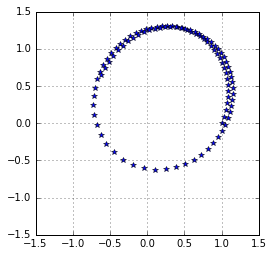

In [19]:
%%time
t,r_vr= R_Kutta(mov_planeta,[1,0,.4,.9],[0,10], 0.1)
zoom=1.5
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],"*")


# Euler mejorado

Jacobiano de la ecuación de movimiento :

In [3]:
%%time
def jac_mp(x,t):
    d_ec=array([0,0,0,0])  # parcial de la ecuacion respecto de t
    r5= (x[0]**2 + x[1]**2)**(2.5)
    rxmry=(2*x[0]*x[0] - x[1]*x[1])/r5
    rymrx=(2*x[1]*x[1] - x[0]*x[0])/r5
    rxry=(3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])# nos regresa una "matriz de 4x4" que en si es un arreglo compuesto de varias listas
    
    return d_ec,Jac

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 115 µs


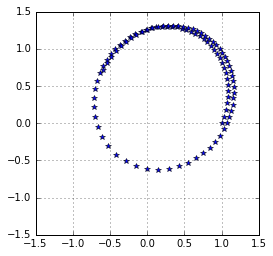

CPU times: user 1.31 s, sys: 12 ms, total: 1.32 s
Wall time: 2.1 s


In [4]:
%%time
t,r_vr= integra2(mov_planeta,jac_mp,[1,0,.4,.9],[0,10], 0.1)
zoom=1.5
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],"*")
show()


# Solución con Runge Kutta 4° orden

CPU times: user 50.6 ms, sys: 5.01 ms, total: 55.6 ms
Wall time: 54.9 ms


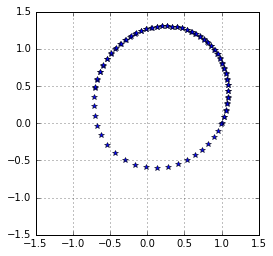

In [15]:
%%time
t,r_vr= R_Kutta_4(mov_planeta,[1,0,.4,.9],[0,10], 0.1)
zoom=1.5
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],"*")

# Odeint 

In [20]:
from scipy.integrate import*

In [21]:
h=0.1
tiempos = arange(0,10+h,h)

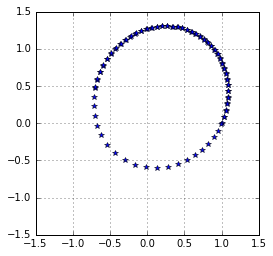

CPU times: user 114 ms, sys: 1.93 ms, total: 116 ms
Wall time: 114 ms


In [24]:
%%time
r_vr= odeint(mov_planeta,[1,0,.4,.9],tiempos)
zoom=1.5
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],"*")
show()

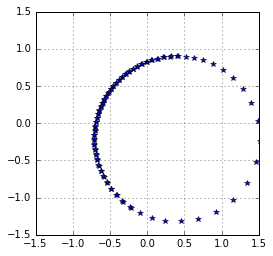

In [25]:
zoom=1.5
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,2],r_vr[:,3],"*")
show()


"hodógrafa" se obtiene graficando la velocidad en "x" y "y", por ello graficamos //plot(r_vr[:,2],r_vr[:,3],"*")//
siempre será un circulo